In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv(r'HUD_data\Louisville_Metro_KY_Meals_Served_Summary_5153789281195901516.csv')
print(df.head())
print(df.info())

   MealID                  Date  BREADFST_SERV  LUNCH_SERV  SNACK_SERV  \
0     301  6/11/2009 4:00:00 AM            0.0          21          25   
1     302  6/11/2009 4:00:00 AM            0.0          22           0   
2     303  6/11/2009 4:00:00 AM            0.0          22          20   
3     304  6/11/2009 4:00:00 AM            0.0          23          26   
4     305  6/11/2009 4:00:00 AM            0.0          27           0   

                        Site            SiteAddress SiteZipcode  ObjectId  
0      VICTORY CHRISTIAN CDC     1410 DIXIE HIGHWAY       40210         1  
1       WALNUT ST ACTIVITIES        1143 S. 3RD ST.       40203         2  
2         REFUGE IN KENTUCKY         207 S. Hancock       40202         3  
3  REDEEMED CHRISTIAN CHURCH  3725 RIVER PARK DRIVE       40211         4  
4  NEW JERUSALEM SPCL MNSTRY     2973 WILSON AVENUE       40211         5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 9 col

In [78]:
df_drop = df[~df.apply(lambda row: row.astype(str).str.contains('STE 231').any(), axis=1)]
print(df_drop)

      MealID                  Date  BREADFST_SERV  LUNCH_SERV  SNACK_SERV  \
0        301  6/11/2009 4:00:00 AM            0.0          21          25   
1        302  6/11/2009 4:00:00 AM            0.0          22           0   
2        303  6/11/2009 4:00:00 AM            0.0          22          20   
3        304  6/11/2009 4:00:00 AM            0.0          23          26   
4        305  6/11/2009 4:00:00 AM            0.0          27           0   
...      ...                   ...            ...         ...         ...   
9987    9652  7/23/2013 4:00:00 AM           30.0          70           0   
9988    9653  7/23/2013 4:00:00 AM           31.0          38           0   
9989    9654  7/23/2013 4:00:00 AM           35.0           0          32   
9990    9655  7/23/2013 4:00:00 AM           35.0          33           0   
9991    9656  7/23/2013 4:00:00 AM           36.0          61           0   

                                   Site              SiteAddress SiteZipcod

In [79]:
meal_totals = df_drop.groupby('SiteZipcode')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(meal_totals)

             BREADFST_SERV  LUNCH_SERV  SNACK_SERV
SiteZipcode                                       
40202               1294.0        3439         400
40203              35726.0       86061        3076
40204              11385.0       18452           0
40205               1296.0        6648           0
40206                 17.0        3753        3696
40208               5998.0        7719           0
40210              14914.0       45617        6992
40211              31187.0       70320       10141
40212               9262.0       53730       18513
40213               5795.0        6833        2068
40214              12023.0       12586        3376
40215               4141.0       15948        5910
40216               9023.0       12563        2769
40218               4661.0       33390       32411
40219                615.0        1471         429
40220               5904.0         709        6788
40223                  0.0        1977        2120
40228               3394.0     

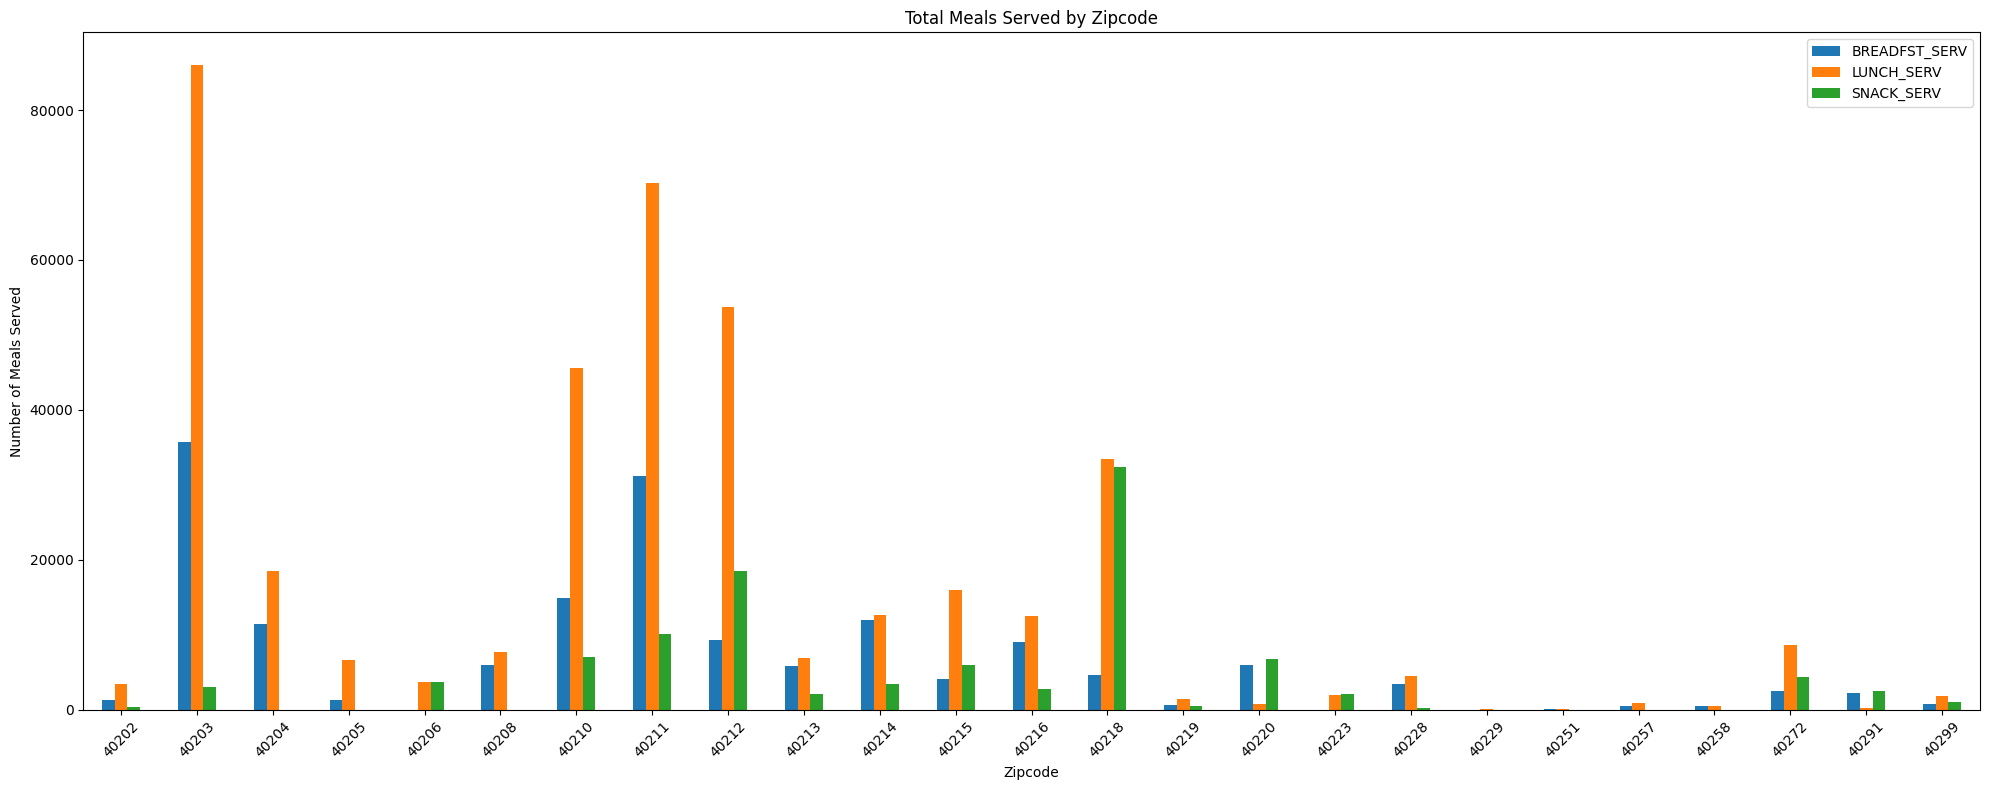

In [80]:
meal_totals.plot(kind='bar', figsize=(20,8))
plt.title('Total Meals Served by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of Meals Served')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [84]:
df_drop['Year'] = pd.to_datetime(df_drop['Date']).dt.year
df_year = df_drop[df_drop['Year'].between(2009, 2014)]
yearly_totals = df_year.groupby('Year')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(yearly_totals)

C:\Users\david\AppData\Local\Temp\ipykernel_14156\1027302247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Year'] = pd.to_datetime(df_drop['Date']).dt.year


      BREADFST_SERV  LUNCH_SERV  SNACK_SERV
Year                                       
2009        35975.0       71567       21522
2010        48236.0      130015       35146
2011        39267.0       90054       23174
2012        18976.0       49689       14247
2013        20757.0       56627       12586


In [4]:
plt.plot(yearly_totals['Year'], yearly_totals['BREADFST_SERV'], label='Breakfast')
plt.plot(yearly_totals['Year'], yearly_totals['LUNCH_SERV'], label='Lunch')
plt.plot(yearly_totals['Year'], yearly_totals['SNACK_SERV'], label='Snack')
plt.title('Meals Served Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Meals Served')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'yearly_totals' is not defined